<ipython-input-1-9fc6ebbf002b>:124: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=2.0)


图片已成功保存至：E:\code\Jupyter_study\股票画图\output\stock_volume_3d_plot_new_color.png


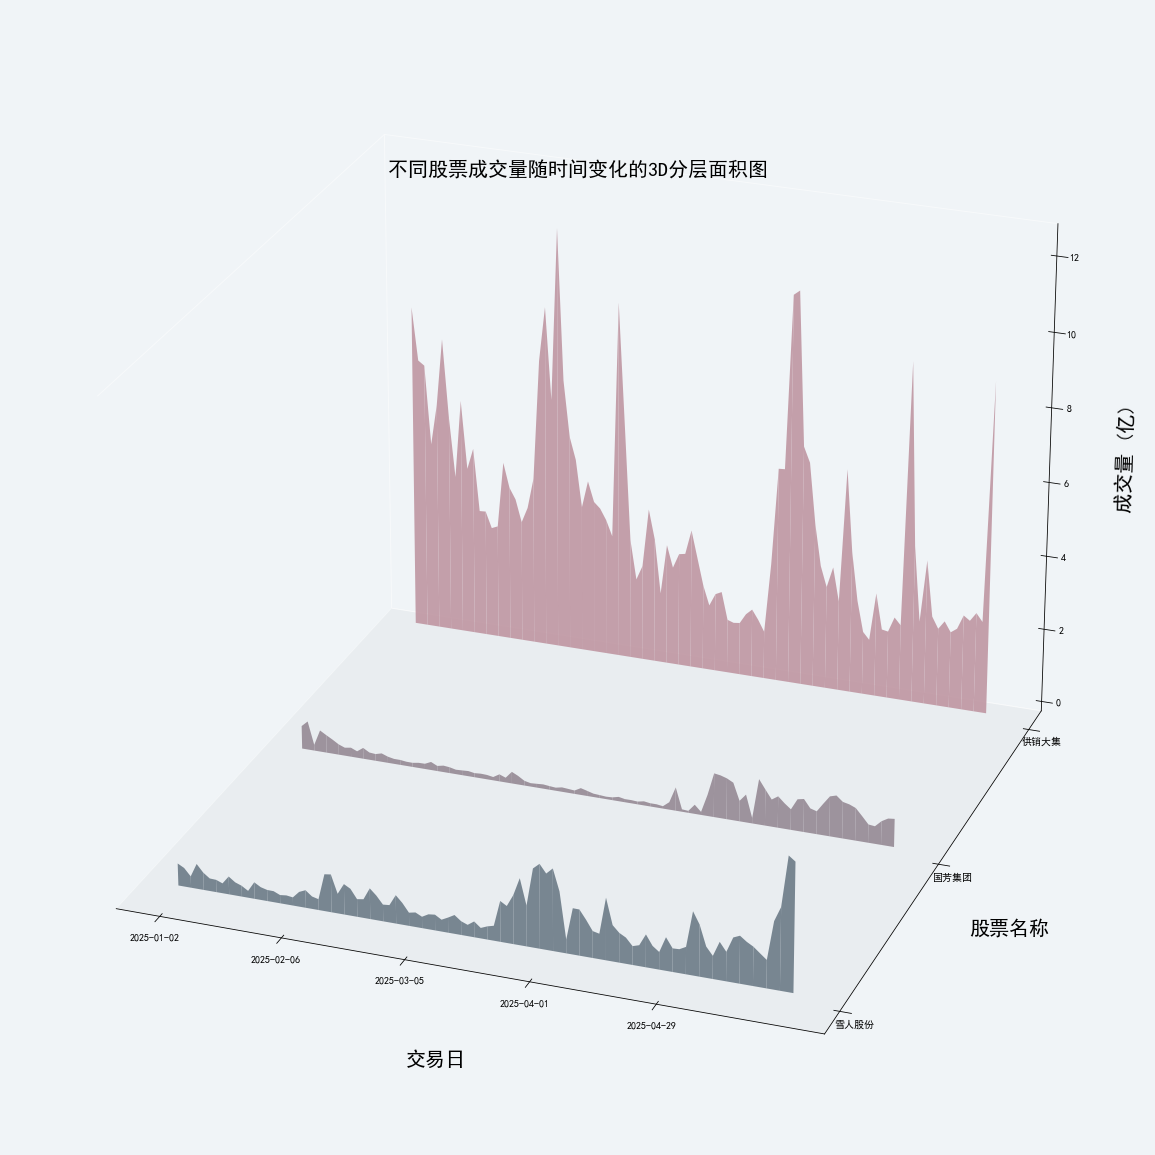

In [1]:
import numpy as np_yxl
import pandas as pd_yxl
import os as os_yxl
import matplotlib.pyplot as plt_yxl
from mpl_toolkits.mplot3d import Axes3D as Axes3D_yxl # 导入3D绘图功能
import matplotlib.cm as cm_yxl
import matplotlib.colors as mcolors_yxl

# --- 确保中文字体正常显示 ---
plt_yxl.rcParams['font.sans-serif'] = ['SimHei']
plt_yxl.rcParams['axes.unicode_minus'] = False

# ----------------------------------------------------
# 1. 数据读取与处理函数 
# ----------------------------------------------------
def load_stock_data_yxl(directory_path_yxl, value_column_yxl='成交量', date_column_yxl='交易时间', name_column_yxl='证券名称'):
    stock_data_dict_yxl = {}
    if not os_yxl.path.exists(directory_path_yxl):
        print(f"错误：目录 '{directory_path_yxl}' 不存在。")
        return stock_data_dict_yxl
        
    supported_files_yxl = [f_yxl for f_yxl in os_yxl.listdir(directory_path_yxl) if f_yxl.endswith(('.csv', '.xls', '.xlsx'))]
    supported_files_yxl.sort()
    
    for filename_yxl in supported_files_yxl:
        file_path_yxl = os_yxl.path.join(directory_path_yxl, filename_yxl)
        try:
            if filename_yxl.endswith('.csv'):
                df_yxl = pd_yxl.read_csv(file_path_yxl, thousands=',')
            else:
                df_yxl = pd_yxl.read_excel(file_path_yxl)
                
            if value_column_yxl in df_yxl.columns:
                df_yxl[value_column_yxl] = pd_yxl.to_numeric(df_yxl[value_column_yxl].astype(str).str.replace(',', ''), errors='coerce')
            else:
                print(f"警告: 在文件 {filename_yxl} 中未找到列 '{value_column_yxl}'。跳过。")
                continue
                
            if date_column_yxl in df_yxl.columns:
                df_yxl[date_column_yxl] = pd_yxl.to_datetime(df_yxl[date_column_yxl])
            else:
                print(f"警告: 在文件 {filename_yxl} 中未找到列 '{date_column_yxl}'。跳过。")
                continue
                
            df_yxl.dropna(subset=[value_column_yxl, date_column_yxl], inplace=True)
            df_yxl.sort_values(by=date_column_yxl, inplace=True, ascending=True)
            
            if name_column_yxl in df_yxl.columns and not df_yxl.empty:
                stock_name_yxl = df_yxl[name_column_yxl].iloc[0]
                stock_data_dict_yxl[stock_name_yxl] = df_yxl
            else:
                stock_data_dict_yxl[os_yxl.path.splitext(filename_yxl)[0]] = df_yxl
        except Exception as e_yxl:
            print(f"处理文件 {filename_yxl} 时发生错误: {e_yxl}")
            
    return stock_data_dict_yxl

# ----------------------------------------------------
# 2. 主绘图逻辑 
# ----------------------------------------------------
DATA_DIR_yxl = r'E:\code\Jupyter_study\股票画图\股票date'
SAVE_PATH_yxl = r'E:\code\Jupyter_study\股票画图\output\stock_volume_3d_plot_new_color.png' # 修改文件名以防覆盖
VALUE_COL_yxl = '成交量'
DATE_COL_yxl = '交易时间'

all_data_yxl = load_stock_data_yxl(DATA_DIR_yxl, value_column_yxl=VALUE_COL_yxl, date_column_yxl=DATE_COL_yxl)

if not all_data_yxl:
    print("没有加载到任何数据，程序退出。")
else:
    fig_yxl = plt_yxl.figure(figsize=(30, 21))
    ax_yxl = fig_yxl.add_subplot(111, projection='3d')
    fig_yxl.patch.set_facecolor('#f0f4f7')
    ax_yxl.set_facecolor('#f0f4f7')

    stock_names_yxl = list(all_data_yxl.keys())
    num_stocks_yxl = len(stock_names_yxl)

    # 1. 定义渐变的起始和结束颜色
    start_color_yxl = '#7A8B99'  # 灰绿色
    end_color_yxl = '#D8AAB7'    # 粉色

    # 2. 使用这两个颜色创建一个自定义的线性颜色映射 (Colormap)
    custom_cmap_yxl = mcolors_yxl.LinearSegmentedColormap.from_list(
        'GrayGreenToPink_yxl', [start_color_yxl, end_color_yxl]
    )

    # 生成颜色列表
    colors_yxl = custom_cmap_yxl(np_yxl.linspace(0, 1, num_stocks_yxl))


    x_ticks_data_yxl = None
    for i_yxl, stock_name_yxl in enumerate(stock_names_yxl):
        df_yxl = all_data_yxl[stock_name_yxl]
        x_data_yxl = np_yxl.arange(len(df_yxl))
        y_offset_yxl = i_yxl
        z_data_yxl = df_yxl[VALUE_COL_yxl].values / 1e8
        
        X_surface_yxl = np_yxl.vstack([x_data_yxl, x_data_yxl])
        Y_surface_yxl = np_yxl.vstack([np_yxl.full_like(x_data_yxl, y_offset_yxl), np_yxl.full_like(x_data_yxl, y_offset_yxl)])
        Z_surface_yxl = np_yxl.vstack([np_yxl.zeros_like(z_data_yxl), z_data_yxl])
        
        ax_yxl.plot_surface(X_surface_yxl, Y_surface_yxl, Z_surface_yxl,
                        color=colors_yxl[i_yxl],
                        alpha=0.9,
                        linewidth=0,
                        antialiased=True)
        if i_yxl == 0:
            tick_spacing_yxl = max(1, len(df_yxl) // 5)
            tick_indices_yxl = x_data_yxl[::tick_spacing_yxl]
            tick_labels_yxl = df_yxl[DATE_COL_yxl].dt.strftime('%Y-%m-%d').iloc[::tick_spacing_yxl]
            x_ticks_data_yxl = (tick_indices_yxl, tick_labels_yxl)

    # --- 图形属性设置 ---
    ax_yxl.grid(False)
    ax_yxl.xaxis.pane.fill = False
    ax_yxl.yaxis.pane.fill = False
    ax_yxl.zaxis.pane.set_facecolor('#e3e8eb')
    ax_yxl.xaxis.pane.set_edgecolor('w')
    ax_yxl.yaxis.pane.set_edgecolor('w')
    ax_yxl.zaxis.pane.set_edgecolor('w')
    ax_yxl.set_xlabel('交易日', fontsize=20, labelpad=40)
    ax_yxl.set_ylabel('股票名称', fontsize=20, labelpad=40)
    ax_yxl.set_zlabel('成交量 (亿)', fontsize=20, labelpad=30)
    
    if x_ticks_data_yxl:
        ax_yxl.set_xticks(x_ticks_data_yxl[0])
        ax_yxl.set_xticklabels(x_ticks_data_yxl[1], rotation=0, ha='center', fontsize=10)
        
    ax_yxl.set_yticks(np_yxl.arange(num_stocks_yxl))
    ax_yxl.set_yticklabels(stock_names_yxl, rotation=0, ha='center', va='center', fontsize=10)
    ax_yxl.set_zlim(0, ax_yxl.get_zlim()[1] * 1.1)
    ax_yxl.view_init(elev=25, azim=-70)
    plt_yxl.title('不同股票成交量随时间变化的3D分层面积图', fontsize=20, y=0.92)
    plt_yxl.tight_layout(pad=2.0)
    
    # --- 保存功能 ---
    if SAVE_PATH_yxl:
        try:
            save_dir_yxl = os_yxl.path.dirname(SAVE_PATH_yxl)
            if save_dir_yxl and not os_yxl.path.exists(save_dir_yxl):
                os_yxl.makedirs(save_dir_yxl)
            plt_yxl.savefig(SAVE_PATH_yxl, dpi=300, bbox_inches='tight', facecolor=fig_yxl.get_facecolor())
            print(f"图片已成功保存至：{SAVE_PATH_yxl}")
        except Exception as e_yxl:
            print(f"保存图片时发生错误：{e_yxl}")
            
    plt_yxl.show()